In [123]:
import random
import networkx as nx
import csv
import matplotlib.pyplot as plt
from itertools import combinations, chain

with open('data.csv', 'r') as file:
    reader = csv.DictReader(file)
    l = list(reader)
authors_list = [e['Authors'].lstrip() for e in l]
nodes = []
edges = []
for authors in authors_list:
    authors = authors.split(' & ')
    if len(authors) == 1:
        nodes.append(authors[0])
    elif len(authors) == 2:
        edges.append(tuple(authors))
    elif len(authors) > 2:
        edges.extend(list(combinations(authors, 2)))
print("Nodos: {}, Aristas: {}".format(len(nodes), len(edges)))

graph = nx.Graph()
graph.add_nodes_from(nodes)
graph.add_edges_from(edges)

Nodos: 2513, Aristas: 13015


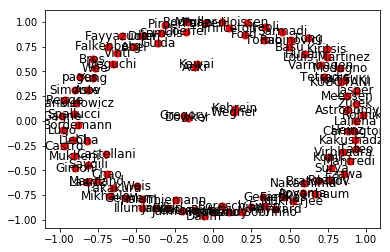

In [49]:
subgraph = graph.subgraph(list(graph.nodes)[:100]) # TODO: tomar subgrafo que respete la distribución de grados
nx.draw_networkx(subgraph, node_size=50)
plt.show()

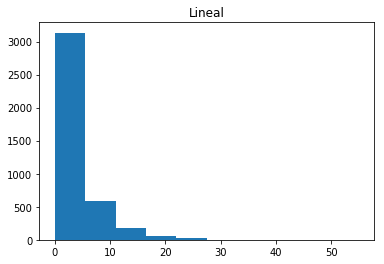

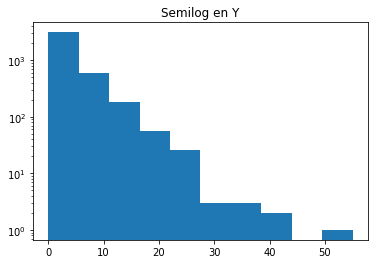

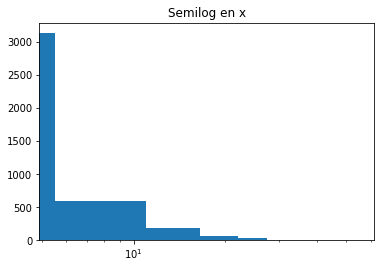

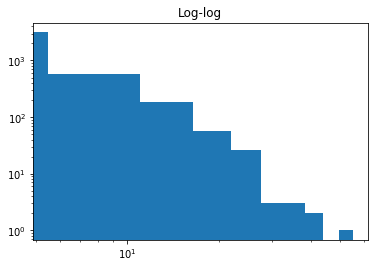

In [57]:
plt.hist(list(dict(graph.degree).values()))
plt.title("Lineal")
plt.show()

plt.hist(list(dict(graph.degree).values()))
plt.yscale('log')
plt.title("Semilog en Y")
plt.show()

plt.hist(list(dict(graph.degree).values()))
plt.xscale('log')
plt.title("Semilog en x")
plt.show()

plt.hist(list(dict(graph.degree).values()))
plt.yscale('log')
plt.xscale('log')
plt.title("Log-log")
plt.show()


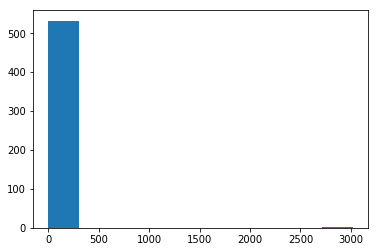

Longitud de componente conexa gigante: 3018


In [66]:
ccs = list(nx.algorithms.components.connected_components(graph))
plt.hist([len(cc) for cc in ccs])
plt.show()
print("Longitud de componente conexa gigante: {}".format(max([len(cc) for cc in ccs])))

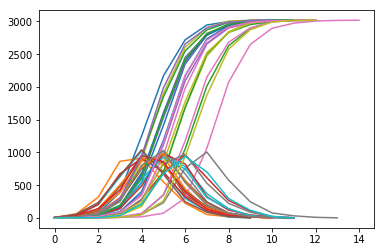

In [173]:
giant_cc_nodes = list(nx.algorithms.components.connected_components(graph))[0]
giant_cc = graph.subgraph(giant_cc_nodes)

def get_neighbors(node):
    return set(giant_cc[node])

def get_neighbors_of_nodes(nodes):
    res = set()
    for node in nodes:
        res |= get_neighbors(node)
    return set(res)

for _ in range(20):
    start = random.choice(list(giant_cc_nodes))
    neighbors = set([start])
    number_of_neighbors = [1]
    number_of_new_neighbors = []
    while len(neighbors) < len(giant_cc_nodes):
        neighbors |= get_neighbors_of_nodes(neighbors)
        number_of_neighbors.append(len(neighbors))
        n_new = number_of_neighbors[-1] - number_of_neighbors[-2]
        number_of_new_neighbors.append(n_new)
    plt.plot(number_of_neighbors)
    plt.plot(number_of_new_neighbors)
plt.show()